In [1]:
# this is just a temp fix to get things working locally. use the server config when starting jupyter
import sys, os

# NOTE: change this path if you need to for your system
client_side_path = os.getcwd()
print("client_side_path: %s" % (client_side_path))
sys.path.append(client_side_path)

client_side_path: /media/dpihera/Extra Drive 1/development/jupyternb_c_app_websockets/client_side


In [2]:
from wsclient.client import TestWebSocketClient
from tornado import ioloop

print("IOLoop: %s" % (ioloop.IOLoop.current()))
client = TestWebSocketClient()
client.connect('ws://localhost:8675/ws')

IOLoop: <zmq.eventloop.ioloop.ZMQIOLoop object at 0x7fc911167978>
WebSocketClient.__init__: cto, rto = 10, 60
WebSocketClient.connect: attempting connection to: ws://localhost:8675/ws
WebSocketClient.connect: ws_conn is: <tornado.concurrent.Future object at 0x7fc91a44ba90>
WebSocketClient.connect: adding to ioloop (<zmq.eventloop.ioloop.ZMQIOLoop object at 0x7fc911167978>)
WebSocketClient.connect: done


Connected to Websocket Server!
client_side.TestWebSocketClient._on_message: precessing Hello World from the server_side
callback not yet defined, cannot process Hello World


<IPython.core.display.Javascript object>


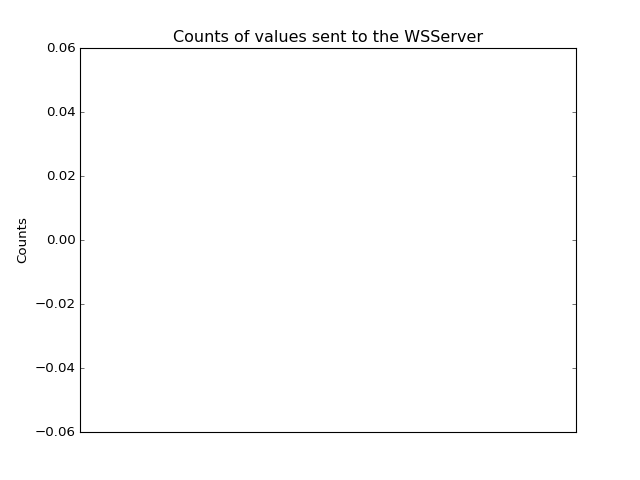

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import json

# values sent mapped to the number of times sent
val_counts = {}

# width of the bars for the chart
bwidth = 0.5
fig = None
ax = None

def labelrects(rects):
    """
    """
    height_scalar = 1.05
    
    # label the bars
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                height_scalar*height,
                '%d' % int(height),
                ha='center', 
                va='bottom')


def setup_plot(vcounts):
    fig, ax = plt.subplots()
    update_plot(fig, ax, vcounts)

    
def update_plot(fig, ax, vcounts):
    """
    """
    # TODO: Not updating right...
    # TODO: make fig, ax, vcounts globals to test
    vals = tuple(k for k,v in vcounts.items())
    counts = [v for k,v in vcounts.items()]
    
    # number of mappings in vcounts (number of bars)
    N = len(vcounts)
    
    # x locations for counts
    ind = np.arange(N)  # the x locations for the groups

    rects = ax.bar(ind, counts, bwidth, color='b')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Counts')
    ax.set_title('Counts of values sent to the WSServer')
    ax.set_xticks(ind + bwidth)
    ax.set_xticklabels(vals)

    if len(rects) > 0:
        ax.legend((rects[0]), ('Counts'))
        autolabel(rects)
    fig.canvas.draw()

    
def client_msg_callback(msg):
#    print(msg)
#    print('called client callback with: %s' % msg)
    jstring = msg.replace("'", "\"")
    d = json.loads(jstring)
    # add to val counts and update plot...
    if 'value' in d:
        v = val_counts.setdefault(d['value'], 0)
        val_counts[d['value']] = v + 1
        print(val_counts)
        update_plot(fig, ax, val_counts)

# Better way to do this? callback feel wrong...
client.msg_callback(client_msg_callback)
setup_plot(val_counts)

In [ ]:
#def client_msg_callback(msg):
#    print('called client callback with: %s' % msg)
#    # add to val counts and update plot...
#    if 'value' in msg:
#        v = val_counts.setdefault(msg['value'], None)
#        val_counts[msg['value']] = v + 1 if v else 1
#        print(val_counts)

# Better way to do this? callback feel wrong...
#client.msg_callback(client_msg_callback)

In [4]:
from ipywidgets import Button, IntSlider
from IPython.display import display

button = Button(description='Send a test Message!')
valinput = IntSlider(description='Enter a number to send', min=0, max=10)

display(valinput)
display(button)

def send_test_msg(b):
    d = {
        'does_it': 'blend',
        'value': valinput.value,
    }
    print('send_test_msg: sending test %s' % (d))
    client.send(d)

button.on_click(send_test_msg)

send_test_msg: sending test {'does_it': 'blend', 'value': 1}
WSC: sending WSS b'{"does_it": "blend", "value": 1}'
client_side.TestWebSocketClient._on_message: precessing {'value': 1, 'does_it': 'blend'} from the server_side
calling callback!
{1: 1}
